In [1]:
import pandas as pd

eeg_file = "data/Rubert_14_may/Rubert_mordida_1/EEG.csv"

df = pd.read_csv(eeg_file)
df.head()

,timestamp,sequence,battery,flags,EEG-ch1,EEG-ch2,EEG-ch3,EEG-ch4,EEG-ch5,EEG-ch6,EEG-ch7,EEG-ch8,EEG-ch9,EEG-ch10,EEG-ch11,EEG-ch12,EEG-ch13,EEG-ch14,EEG-ch15,EEG-ch16
0,153804687683,16336,-2,0,-2553.890054,-6876.865884,31106.838605,214.528663,22527.894451,8132.718209,21134.279463,30553.415250,-10230.794172,-5388.805234,17134.538498,10109.798595,-17322.626756,17221.805220,-10619.150551,9531.200275
1,153804687683,16336,-2,0,-2557.710711,-6880.297175,31105.195966,214.772017,22528.880034,8132.827718,21137.443064,30554.473840,-10229.407054,-5388.087339,17137.081547,10109.774259,-17321.945365,17222.158083,-10620.878364,9531.504468
2,153804687683,16336,-2,0,-2570.961333,-6885.176421,31096.520398,210.002279,22524.438825,8130.528023,21134.948686,30551.626599,-10230.392638,-5389.218935,17135.268560,10101.329878,-17325.364488,17223.642542,-10621.778774,9531.832996
3,153804687683,16336,-2,0,-2585.039358,-6887.330103,31091.774996,201.935096,22518.805181,8127.899801,21129.205533,30548.767190,-10233.677916,-5390.934580,17132.956698,10096.827830,-17330.377579,17223.715548,-10622.642680,9530.056512
4,153804687683,16336,-2,0,-2573.200189,-6886.064663,31095.473976,200.523644,22517.126039,8126.330168,21127.404714,30550.957375,-10236.634666,-5391.761984,17130.401481,10101.926095,-17333.188317,17223.350517,-10622.022128,9527.744649


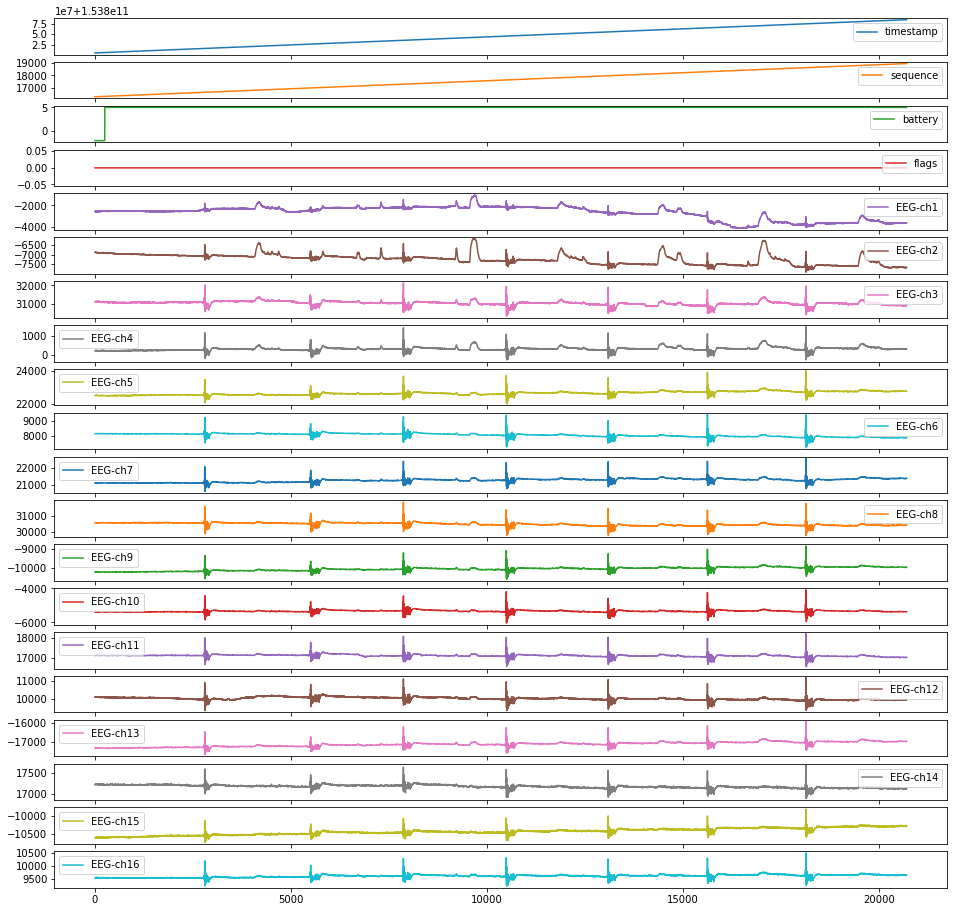

In [2]:
df.plot(subplots=True, figsize=(16, 16));

In [3]:
import bbtools as bbt

raw_rubert = bbt.read_csv(eeg_file,
                        ['Fp1', 'Fp2', 'F3', 'F4', 'C1', 'C3', 'C2', 'C4', 'CP1', 'CP3', 'CP2', 'CP4', 'Cz', 'O1', 'O2', 'Pz'])

Creating RawArray with float64 data, n_channels=16, n_times=20712
    Range : 0 ... 20711 =      0.000 ...    80.902 secs
Ready.


Effective window size : 8.000 (s)


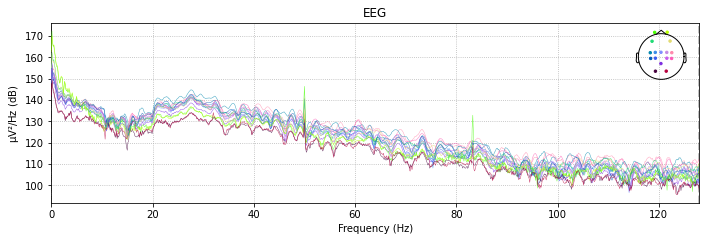

In [4]:
plot_raw = raw_rubert.plot_psd(fmin = 0, fmax = 128, average=False, tmin = 0, tmax = 120)
#plot_raw = raw_rubert.plot_psd(fmin = 0, fmax = 128, average=True, tmin = 0, tmax = 120)
#plot_raw = raw_rubert.plot_psd()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (6.605 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Effective window size : 8.000 (s)


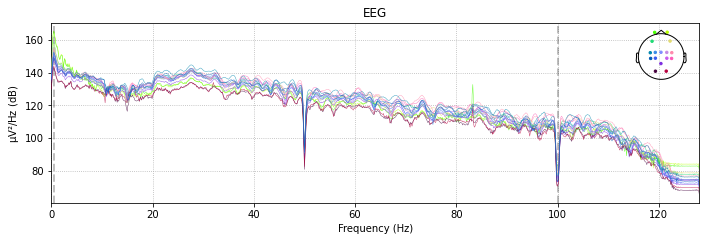

In [5]:
filtered_rubert = bbt.filters(raw_rubert)
plot_filtered = filtered_rubert.plot_psd(fmin = 0, fmax = 128, average=False, tmin = 0, tmax = 120)